# Model Answer: Logistic Regression Model
## Practical Task: Iris-setosa and Not-Iris-setosa Classification

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
# Load the CSV file into a DataFrame
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Display an overview of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Generate descriptive statistics for the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Count the occurrences of each unique value in the 'Species' column
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Iris-setosa and Not-Iris-setosa Classification

In [6]:
# Create a copy of the original DataFrame
iris2 = iris.copy()
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Assign Iris-setosa to 0 and Not-Iris-setosa to 1.
iris2["Species"] = np.where(iris2["Species"] == "Iris-setosa", 0, 1)

In [8]:
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
# Count the occurrences of each unique value in the 'Species' column
iris2["Species"].value_counts()

Species
1    100
0     50
Name: count, dtype: int64

In [10]:
# Define X and y
X = iris2.drop(["Id","Species"], axis=1)
y = iris2["Species"]

In [11]:
# Scale the data
X = preprocessing.scale(X)

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model to the training set
logreg.fit(X_train, y_train)

# Make predictions on the test set
predictions = logreg.predict(X_test)

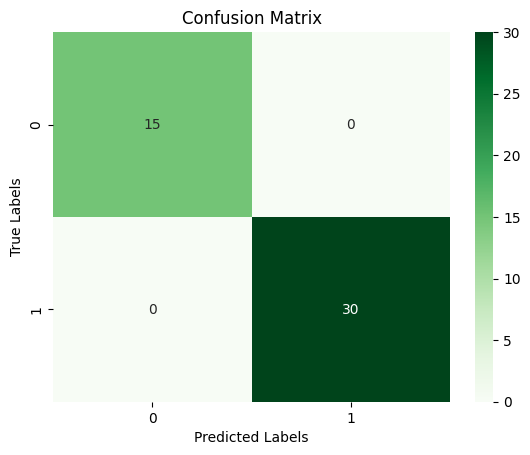

In [14]:
# Evaluate the model using the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**Note:** The model seems to predict perfectly whether an instance is Iris-setosa or Not-Iris-setosa. It correctly predicted 15 Iris-setosa cases and 30 Not-setosa cases, with no false positives or false negatives presented.

### Code to calculate the accuracy, precision, and recall.

**Note:** The following functions require classes to be encoded from 0 to the total number of classes minus one (e.g., for 3 classes: class 1 = 0, class 2 = 1, and class 3 = 2).  

In [15]:
def get_accuracy(true_labels, predicted_labels, number_of_classes):
    """
    Calculate the accuracy of predictions for a classification problem.

    Parameters:
    true_labels (array-like): Actual labels for the data points.
    predicted_labels (array-like): Predicted labels from the model.
    number_of_classes (int): Total number of unique classes in the classification task.

    Returns:
    float: The average accuracy score across all classes.
    """
    accuracy_per_class = []
    for n in range(number_of_classes):
        accuracy = sum(true_labels == predicted_labels) / len(predicted_labels)
        accuracy_per_class.append(accuracy)
    final_accuracy_score = sum(accuracy_per_class) / len(accuracy_per_class)
    return final_accuracy_score

In [16]:
def get_precision(true_labels, predicted_labels, number_of_classes):
    """
    Calculate the precision of predictions for a classification problem.

    Parameters:
    true_labels (array-like): Actual labels for the data points.
    predicted_labels (array-like): Predicted labels from the model.
    number_of_classes (int): Total number of unique classes in the classification task.

    Returns:
    float: The average precision score across all classes.
    """
    precision_per_class = []
    for n in range(number_of_classes):
        TP = sum((true_labels == n) & (true_labels == predicted_labels))
        FP = sum((predicted_labels == n) & (true_labels != predicted_labels))
        precision = TP / (TP + FP)
        precision_per_class.append(precision)
    final_precision_score = sum(precision_per_class) / len(precision_per_class)
    return final_precision_score

In [17]:
def get_recall(true_labels, predicted_labels, number_of_classes):
    """
    Calculate the recall of predictions for a classification problem.

    Parameters:
    true_labels (array-like): Actual labels for the data points.
    predicted_labels (array-like): Predicted labels from the model.
    number_of_classes (int): Total number of unique classes in the classification task.

    Returns:
    float: The average recall score across all classes.
    """
    recall_per_class = []
    for n in range(number_of_classes):
        TP = sum((true_labels == n) & (true_labels == predicted_labels))
        FN = sum((predicted_labels != n) & (true_labels == n))
        recall = TP / (TP + FN)
        recall_per_class.append(recall)
    final_recall_score = sum(recall_per_class) / len(recall_per_class)
    return final_recall_score

In [18]:
print("Accuracy:", get_accuracy(y_test, predictions, 2))
print("Precision:", get_precision(y_test, predictions, 2))
print("Recall:", get_recall(y_test, predictions, 2))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [19]:
# Double-check scores using scikit-learn
accuracy_check = accuracy_score(y_test, predictions)
precision_check = precision_score(y_test, predictions)
recall_check = recall_score(y_test, predictions)

print("Checking Accuracy Score:", accuracy_check)
print("Checking Precision Score:", precision_check)
print("Checking Recall Score:", recall_check)

Checking Accuracy Score: 1.0
Checking Precision Score: 1.0
Checking Recall Score: 1.0


## Optional Task: Iris-setosa, Iris-versicolour, and Iris-virginica Classification

In [20]:
# Return the first five observations
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Count the occurrences of each unique value in the "Species" column
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [22]:
# Make a copy of the orginal data
iris3 = iris.copy()

In [23]:
# Encode Species: Iris-setosa (0), Iris-versicolor (1), and Iris-virginica (2).
iris3["Species"] = iris3["Species"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

C:\Users\27748\AppData\Local\Temp\ipykernel_4680\1018317634.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris3["Species"] = iris3["Species"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})


In [24]:
# Check new DataFrame
iris3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [25]:
# Count the occurrences of each unique value in the "Species" column
iris3["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [26]:
# Define X and y
X = iris3.drop(["Id","Species"], axis=1)
y = iris3["Species"]

In [27]:
# Scale the data
X = preprocessing.scale(X)

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [29]:
# Instantiate the model
logreg2 = LogisticRegression()

# Fit the model to the training set
logreg2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg2.predict(X_test)

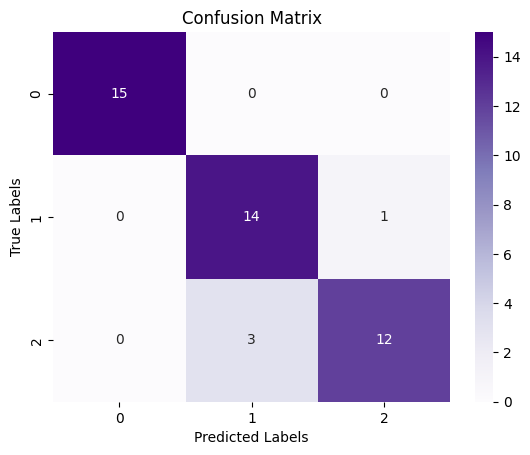

In [30]:
# Evaluate the model using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**Note:** The model seems to classify all Iris-setosas (0) correctly but makes some misclassifications between Iris-versicolor (1) and Iris-virginica (2). Iris-virginica appears to be the most challenging for the model to predict, as it makes more mistakes in identifying it.

In [31]:
# Function to calculate the accuracy of predictions for a classification problem.
# Accuracy is defined as the ratio of correctly predicted instances (TP + TN) to the total instances (TP + TN + FP + FN).

def get_accuracy(true_labels, predicted_labels, number_of_classes):
    accuracy_per_class = []
    for n in range(number_of_classes):
        accuracy = sum(true_labels == predicted_labels) / len(predicted_labels)
        accuracy_per_class.append(accuracy)
    final_accuracy_score = sum(accuracy_per_class) / len(accuracy_per_class)
    return final_accuracy_score

In [32]:
# Function to calculate the precision of predictions for a classification problem.
# Precision is defined as the ratio of true positives (TP) to the total predicted positives (TP + FP).

def get_precision(true_labels, predicted_labels, number_of_classes):
    precision_per_class = []
    for n in range(number_of_classes):
        TP = sum((true_labels == n) & (true_labels == predicted_labels))
        FP = sum((predicted_labels == n) & (true_labels != predicted_labels))
        precision = TP / (TP + FP)
        precision_per_class.append(precision)
    final_precision_score = sum(precision_per_class) / len(precision_per_class)
    return final_precision_score

In [33]:
# Function to calculate the recall of predictions for a classification problem.
# Recall is defined as the ratio of true positives (TP) to the total actual positives (TP + FN).

def get_recall(true_labels, predicted_labels, number_of_classes):
    recall_per_class = []
    for n in range(number_of_classes):
        TP = sum((true_labels == n) & (true_labels == predicted_labels))
        FN = sum((predicted_labels != n) & (true_labels == n))
        recall = TP / (TP + FN)
        recall_per_class.append(recall)
    final_recall_score = sum(recall_per_class) / len(recall_per_class)
    return final_recall_score

In [34]:
print("Accuracy:", get_accuracy(y_test,y_pred, 3))
print("Precision:", get_precision(y_test,y_pred, 3))
print("Recall:", get_recall(y_test,y_pred, 3))

Accuracy: 0.9111111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111


In [35]:
# Double-check scores using scikit-learn methods:
accuracy_check2 = accuracy_score(y_test, y_pred)
precision_check2 = precision_score(y_test, y_pred, average="weighted")
recall_check2 = recall_score(y_test, y_pred, average="weighted")

print("Checking Accuracy Score:", accuracy_check2)
print("Checking Precision Score:", precision_check2)
print("Checking Recall Score:", recall_check2)

Checking Accuracy Score: 0.9111111111111111
Checking Precision Score: 0.9155354449472096
Checking Recall Score: 0.9111111111111111


In [36]:
# Extra: Check scores per class using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

